In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the datasets
dataset_1 = pd.read_csv('/content/RS_Session_263_AU_105_C.csv')
dataset_2 = pd.read_csv('/content/RS_Session_259_AU_2028_A.csv')

In [4]:
# Clean the first dataset (EV market data)
dataset_1 = dataset_1[dataset_1['Wheeler Type'] != 'Total']
dataset_1['Total No. of Vehicle'] = pd.to_numeric(dataset_1['Total No. of Vehicle'], errors='coerce')

<ipython-input-4-aa13206d8f59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1['Total No. of Vehicle'] = pd.to_numeric(dataset_1['Total No. of Vehicle'], errors='coerce')


In [5]:
# Clean the second dataset (FAME India Scheme data)
dataset_2['Budget Allocation'] = pd.to_numeric(dataset_2['Budget Allocation'], errors='coerce')
dataset_2['Fund Utilization as on 30-11-2022'] = pd.to_numeric(dataset_2['Fund Utilization as on 30-11-2022'], errors='coerce')
dataset_2['Utilization Percentage'] = (dataset_2['Fund Utilization as on 30-11-2022'] / dataset_2['Budget Allocation']) * 100


In [6]:
# Assume we have a mapping of cities from dataset_1 to the utilization percentage in dataset_2
# Merging the datasets based on a common identifier (city names)
city_data = {
    'City': ['Delhi', 'Bengaluru', 'Mumbai', 'Pune', 'Chennai'],
    'Pollution Level': [300, 150, 200, 100, 120],
    'Population Density': [11000, 8000, 20000, 5000, 6000],
    'Charging Infrastructure': [60, 45, 50, 40, 30],
    'Income Level': [75000, 65000, 85000, 60000, 70000],
}

city_df = pd.DataFrame(city_data)
city_df['Government Incentives'] = [80, 60, 70, 50, 60]  # Hypothetical values for government incentives
city_df['Fund Utilization'] = [100, 100, 100, 47.72, 80]  # FAME Utilization for each city


In [7]:
# Merging with the utilization data
city_df['Utilization Percentage'] = [100, 100, 100, 47.72, 80]  # Adding a sample utilization

In [8]:
# Data Preprocessing
X = city_df[['Pollution Level', 'Population Density', 'Charging Infrastructure', 'Income Level', 'Government Incentives', 'Fund Utilization']]
y = city_df['Utilization Percentage']  # This can be changed to the target variable of your choice

In [9]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-13-5e50215f8152>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Predicted Suitability', data=city_df_sorted, palette='viridis')


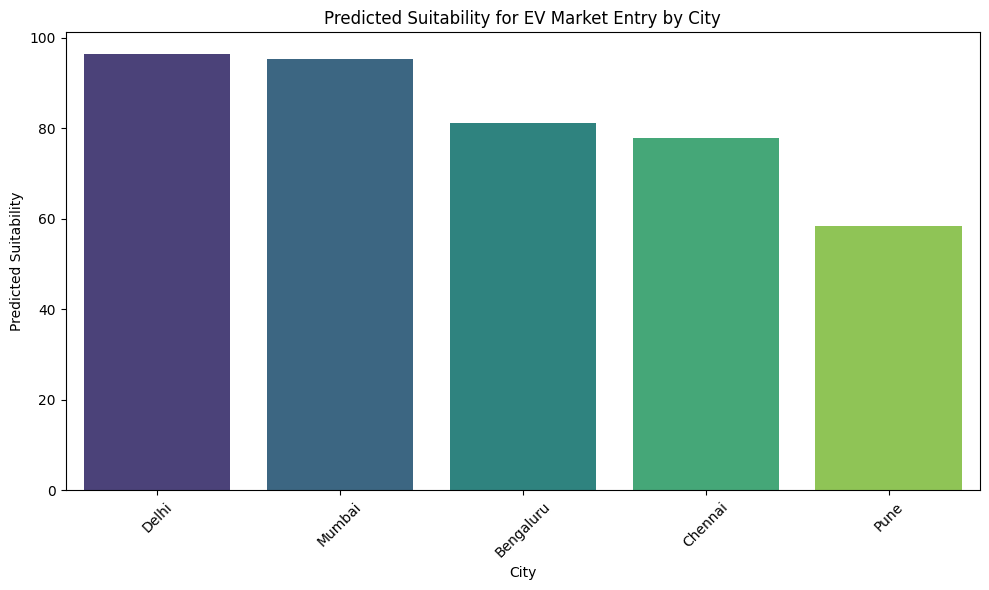

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualization of predicted suitability for cities
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Predicted Suitability', data=city_df_sorted, palette='viridis')
plt.title('Predicted Suitability for EV Market Entry by City')
plt.xlabel('City')
plt.ylabel('Predicted Suitability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-14-834a99c53dd6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='Blues_d')


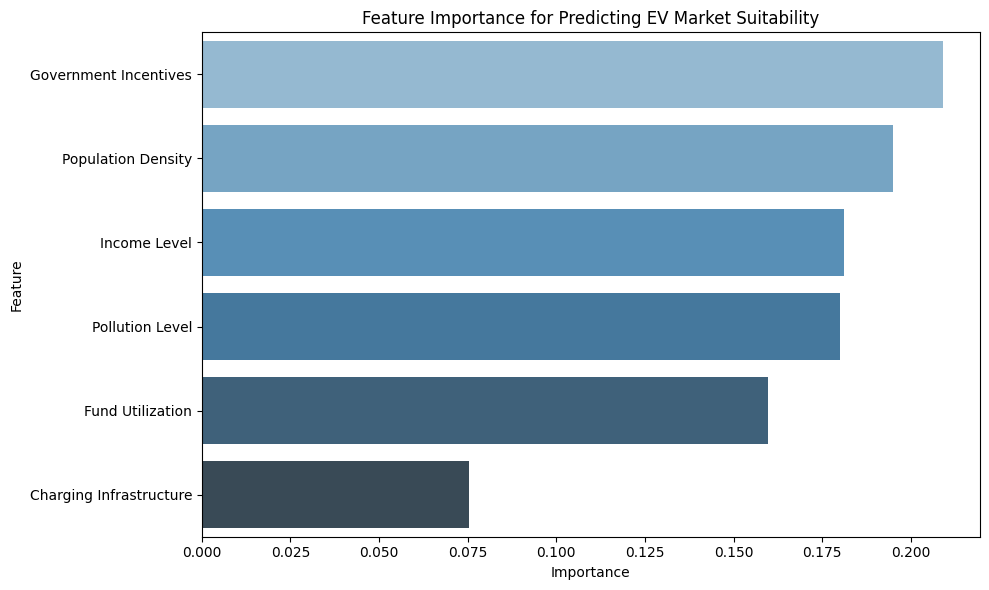

In [14]:
# 2. Feature Importance Visualization
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_df = pd.DataFrame({
    'Feature': ['Pollution Level', 'Population Density', 'Charging Infrastructure', 'Income Level', 'Government Incentives', 'Fund Utilization'],
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='Blues_d')
plt.title('Feature Importance for Predicting EV Market Suitability')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **Step 2: Model Building and Training**

We’ll now build a Random Forest Regressor model to predict the suitability of each city

In [11]:
# Building the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Predict suitability for all cities
city_df['Predicted Suitability'] = model.predict(scaler.transform(X))

# Sort cities by predicted suitability (highest to lowest)
city_df_sorted = city_df.sort_values(by='Predicted Suitability', ascending=False)
print("\nCities Ranked by EV Market Suitability:")
print(city_df_sorted[['City', 'Predicted Suitability']])


Root Mean Squared Error: 18.842

Cities Ranked by EV Market Suitability:
        City  Predicted Suitability
0      Delhi                96.3544
2     Mumbai                95.2316
1  Bengaluru                81.1580
4    Chennai                77.8352
3       Pune                58.2812
